<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/EVA4P2_NeuralStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Oct 10 09:47:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Choose a style

Not all style images are equal. For the best results, pick images that:


1.   Have large geometric patterns on the scale of 10% - 33% of the images width
2.   Have bold, contrasting color palletes
3.   Have strong edges

If you're looking for inspiration, consider searching [Unslash](https://unspalsh.com) for [Flickr](https://www.flickr.com/search/) for terms like "abstract" or "geometric".

Make sure any images you use have an appropriate license.


In [ ]:
!mkdir ./style_transfer/data/

mkdir: cannot create directory ‘./style_transfer/data/’: No such file or directory


## Download Training Data

We will use the 5000 images from the [COCO 2017 validation](http://cocodataset.org/#download) dataset for training.

In [ ]:
training_data_url = "http://images.cocodataset.org/zips/val2017.zip"

!mkdir -p /content/style_transfer/data/ && wget $training_data_url

print("Unzipping")
with io.capture_output(stderr=False):
    !unzip -o -d style_transfer/data/ ./val2017.zip

print(f"Finished Downloading data")

--2020-10-10 09:51:39--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.238.107
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.238.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip.1’

val2017.zip.1       100%[===================>] 777.80M  94.7MB/s    in 8.1s    

2020-10-10 09:51:47 (95.6 MB/s) - ‘val2017.zip.1’ saved [815585330/815585330]

Unzipping
Finished Downloading data


In [ ]:
!unzip -o -d style_transfer/data/ ./val2017.zip

In [ ]:
import glob
glob.glob("/content/style_transfer/data/*")

[]

# PyTorch Variant

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv /content/fritz-models/style_transfer/data/val2017 /content

In [ ]:
!mv sample_data/style_* /content/style_images/
!ls -rlt /content/style_images/*

In [ ]:
!git clone https://github.com/eriklindernoren/Fast-Neural-Style-Transfer.git

Cloning into 'Fast-Neural-Style-Transfer'...
remote: Enumerating objects: 94, done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 94
Unpacking objects: 100% (94/94), done.


In [ ]:
!cp -Rf /content/drive/My\ Drive/EVA4/Fast-Neural-Style-Transfer /content/ 
!cp -Rf /content/drive/My\ Drive/EVA4/style_images /content/

In [ ]:
!python /content/Fast-Neural-Style-Transfer/train_new.py  --dataset_path /content/style_transfer/data/ \
                  --style_image /content/style_images/style_4.jpg \
                  --epochs 2 \
                  --batch_size 4 \
                  --image_size 128  \
                  --checkpoint_interval 200 \
                  --sample_interval 100 \
                  --checkpoint_model "/content/checkpoints/style_4_2400.pth"

[Epoch 2/2] [Batch 1249/5000] [Content: 2825240.25 (2709939.13) Style: 1248380.62 (1511272.93) Total: 4073621.00 (4221212.06)]

In [86]:
!python /content/Fast-Neural-Style-Transfer/train_new.py  --dataset_path /content/style_transfer/data/ \
                  --style_image /content/style_images/style_19.jpg \
                  --epochs 5 \
                  --batch_size 4 \
                  --image_size 128  \
                  --checkpoint_interval 200 \
                  --sample_interval 100 \
                  --lambda_content 1e6 \


[Epoch 1/5] [Batch 100/5000] [Content: 16751112.00 (12724257.19) Style: 29122184.00 (54206302.48) Total: 45873296.00 (66930559.56)]
[Epoch 1/5] [Batch 200/5000] [Content: 19111888.00 (15417360.24) Style: 9549080.00 (34943768.55) Total: 28660968.00 (50361128.65)]
[Epoch 1/5] [Batch 300/5000] [Content: 17986722.00 (16353462.07) Style: 7681704.00 (26187188.22) Total: 25668426.00 (42540650.20)]
[Epoch 1/5] [Batch 400/5000] [Content: 17792934.00 (16701092.09) Style: 6542280.50 (21482728.52) Total: 24335214.00 (38183820.53)]
[Epoch 1/5] [Batch 500/5000] [Content: 17330908.00 (16761604.61) Style: 6306795.50 (18532968.88) Total: 23637704.00 (35294573.44)]
[Epoch 1/5] [Batch 600/5000] [Content: 16821264.00 (16744760.36) Style: 5447704.50 (16487004.47) Total: 22268968.00 (33231764.79)]
[Epoch 1/5] [Batch 700/5000] [Content: 16022617.00 (16676482.71) Style: 5866394.00 (14980711.74) Total: 21889012.00 (31657194.42)]
[Epoch 1/5] [Batch 800/5000] [Content: 15428442.00 (16580204.12) Style: 5098774.00

In [80]:
!ls -1rt  /content/checkpoints/*6200*|tail -1

/content/checkpoints/style_7_6200.pth


In [79]:
for file_name in glob.glob("/content/content_images/*"):
    os.environ["CONTENT_IMAGE"] = file_name
    !python /content/Fast-Neural-Style-Transfer/test_on_image.py \
        --image_path $CONTENT_IMAGE \
        --checkpoint_model  /content/checkpoints/style_19_6200.pth

Namespace(checkpoint_model='/content/checkpoints/style_7_6200.pth', image_path='/content/content_images/tilt4.jpg')
Namespace(checkpoint_model='/content/checkpoints/style_7_6200.pth', image_path='/content/content_images/imagesYash.jpg')
Namespace(checkpoint_model='/content/checkpoints/style_7_6200.pth', image_path='/content/content_images/ivankatilt.jpg')
Namespace(checkpoint_model='/content/checkpoints/style_7_6200.pth', image_path='/content/content_images/Chris-Hemsworth-as-Thor.jpg')
Namespace(checkpoint_model='/content/checkpoints/style_7_6200.pth', image_path='/content/content_images/SUMMER.jpg')


In [81]:
!cp $(ls -1 /content/checkpoints/*6200*|tail -1) /content/drive/My\ Drive/EVA4/Style_Transfer_saves

In [84]:
!cp /content/checkpoints/style_7_6200.pth /content/drive/My\ Drive/EVA4/Style_Transfer_saves/

In [85]:
!ls -lrt /content/drive/My\ Drive/EVA4/Style_Transfer_saves

total 111911
-rw------- 1 root root 6740585 Oct 10 10:01 style_1_2400.pth
-rw------- 1 root root 6740585 Oct 10 11:16 style_6_6200.pth
-rw------- 1 root root 6740585 Oct 10 11:53 style_8_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_2_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_10_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_18_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_17_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_16_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_15_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_13_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_12_6200.pth
-rw------- 1 root root 6740585 Oct 10 12:59 style_11_6200.pth
-rw------- 1 root root 6740585 Oct 10 14:06 style_4_6200.pth
-rw------- 1 root root 6740585 Oct 10 14:11 test_pink.pth
-rw------- 1 root root 6740585 Oct 10 14:27 style_14_6200.pth
-rw------- 1 root root 6740585 Oct 10 14:29 style_9_6200.pth
-rw--

In [ ]:
!python /content/Fast-Neural-Style-Transfer/test_on_image.py --image_path /content/thorendgame1.jpg --checkpoint_model /content/checkpoints/style_1_2200.pth

Namespace(checkpoint_model='/content/checkpoints/style_1_2200.pth', image_path='/content/thorendgame1.jpg')


In [ ]:
!python /content/Fast-Neural-Style-Transfer/test_on_image.py \
            --image_path /content/Chris-Hemsworth-as-Thor.jpg \
            --checkpoint_model /content/checkpoints/style_10_2400.pth \

Namespace(checkpoint_model='/content/checkpoints/style_10_2400.pth', image_path='/content/Chris-Hemsworth-as-Thor.jpg')
Traceback (most recent call last):
  File "/content/Fast-Neural-Style-Transfer/test_on_image.py", line 30, in <module>
    image_tensor = Variable(transform(Image.open(args.image_path))).to(device)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2809, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/content/Chris-Hemsworth-as-Thor.jpg'


### Samples

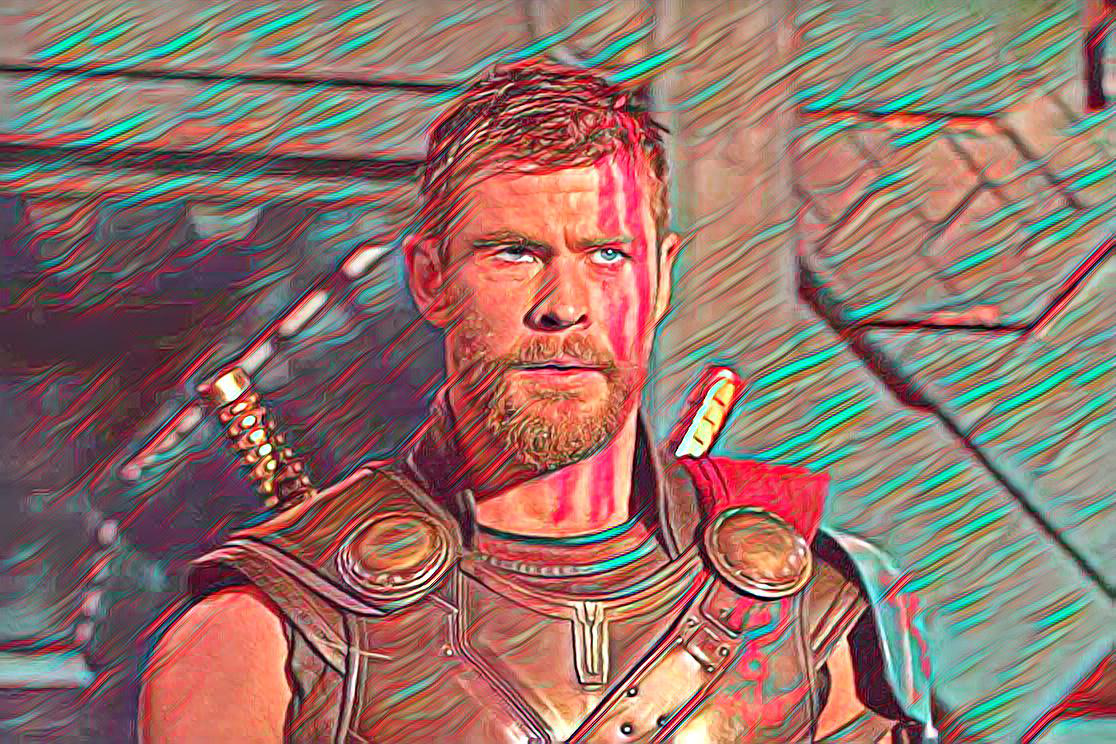

In [ ]:
Image.open("/content/stylized_3.jpg")

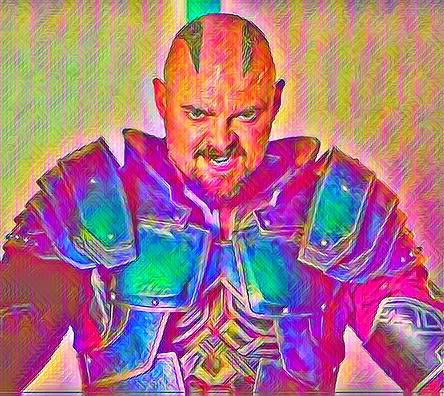

In [ ]:
Image.open("/content/stylized_5.jpg")

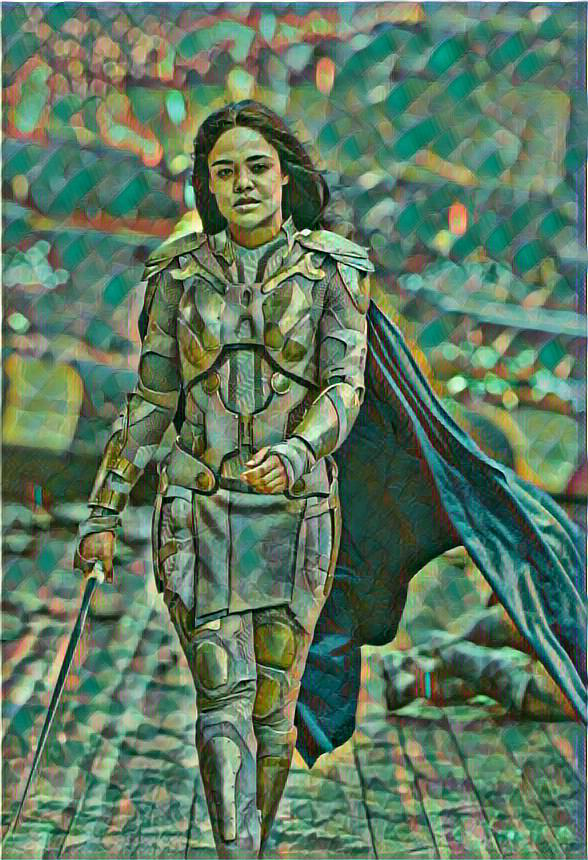

In [ ]:
Image.open("/content/stylized_6.jpg")